## Week 9: Lecture 1

Following a review of loops and conditionals for simulation, we will look at hypothesis testing. Here we try to validate assumptions in a model by comparing a sample to a population. The assumptions allow us to use simulation to understand the process behind the population generating the samples.

In [94]:
# some data science packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# some helpful functions we wrote for you

from helper_functions import *

### Exercise 

**(a)** We want to have a procedure to check the length of words. 

_(i)_ Write a function `longer_than_five` that checks that the length of a word is greater than 5.

- Input: string representing a word. For example, `"apple"`. 
- Output: true / false depending on whether the length is greater / less than or equal to 5. For example, `False`. 

Try to use the built-in function `len`

In [95]:
# TRY IT!

def longer_than_five(word):
    return len(word) > 5

_(ii)_ Write a function `compare_length` to check whether two words have the same length.  

- Input: two strings representing words. For example, `"apple"` and `"banana"`. 
- Output: true / false depending on whether the length is equal / not equal. For example, `False`. 

Remember `==` for equals.

In [96]:
# TRY IT!

def compare_length(word1, word2):
    return len(word1) == len(word2)

**(b)** Write a function called `absolute_value` such that 

- Input: Any number. For example, we could input 4.5 or -10
- Output: If the input is greater than or equal to 0, then we output the same number. Otherwise we output -1 times the number. For example, we could have 4.5 or $(-1)*(-10) = 10$

In [97]:
# TRY IT!

def absolute_value(x):
    if x >= 0: 
        return x
    else:
        return -x

**(c)** Using a `for` statement, we can perform a task multiple times. This is known as iteration. One use of iteration is to loop through a set of values. 

For instance, we can print out all of the colors of the rainbow. Write a `for` loop to print all entries of the following array.

In [99]:
rainbow = np.array(["red", "orange", "yellow", "green", "blue", "indigo", "violet"])

Remember that the indented part of the `for` loop, known as the **body**, is executed once for each item in `rainbow`.


In [100]:
# TRY IT!

for color in rainbow: 
    print(color)

red
orange
yellow
green
blue
indigo
violet


### Example (Text in Novels)

Below, we've loaded the text of _Pride and Prejudice_ by Jane Austen. We split the novel into individual words and stored these words in an array `p_and_p_words`. 

In [101]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

Use a `for` loop and `longer_than_five` to count the number of words in the novel that are more than 5 letters long.

In [102]:
count_of_words = 0 

for word in p_and_p_words:
    # TRY IT!
    if longer_than_five(word):
        count_of_words = count_of_words + 1
    
print(count_of_words)

35453


Suppose you pick two words with replacement from Pride and Prejudice uniformly at random. What are the chances that the words have the same lengths? 

For exampe, if `p_and_p_words` were `["apple", "banana", "pears", "fig"]` then can we compute the probability? Note that we have probabilities $$1/4,2/4,1/4$$ for words of length $$3,5,6$$ 

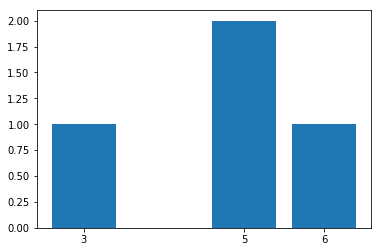

In [103]:
plt.bar([3,5,6], [1,2,1], tick_label = [3,5,6]);

So we need to select two words of length 5. There are $$4 \times 4$$ possible ways to choose two words with replace. There are $$2 \times 2$$ ways to choose two words of length 5. Therefore we have $$\frac{2 \times 2}{4 \times 4} = \frac{2}{4} \times \frac{2}{4}$$ We can interpret the expression as 

- probability 2/4 for the first choice
- probability 2/4 for the second choice

The probability that both events happen is the product. 

Since we have so many words in the text, we should try to use a simulation to make an estimate. Let us sample two words with replacement 10,000 times. We will use `compare_length` to check the words.

In [104]:
trials = 10000
number_same_length = 0

for trial in range(trials):
    first_word, second_word = sample_with_replacement(2, p_and_p_words)

    # TRY IT!
    if compare_length(first_word, second_word):
        number_same_length = number_same_length + 1
    
print(number_same_length / trials)

0.1467


### Example (Colors of Flowers)

Mendel did experiments on varieties of pea plants. He formulated sets of assumptions about each variety. For example, he assumed that for every plant, there is a 

- 75% chance purple flowers 
- 25% chance white flowers 

regardless of the colors in all the other plants. This was his models. He then tested the validity of his models by growing the plants and gathering data. During his studies, he collected 929 peas. Of these 709 were purple. Under the assumption of Mendel's model, how representative is the sample of the population?  

We can test the validity through simulation. Through many trials, we can simulate the proportions of white and purple flowers. Since we want the proportions of purple flowers to be near 75%, we need a statistic to capture the distance. So we will employ `absolute_value` to calculate the distance

$$|\text{proportion of purple flowers} - 75|$$

First we write a function `proportion_purple_flowers` to help us with one trial. Here we use our helper function `sample_proportions`.

In [105]:
predicted_proportions = np.array([0.75, 0.25])

def proportion_purple_flowers():
    proportion_purple, proportion_white = sample_proportions(929, predicted_proportions)
    return proportion_purple

In [106]:
proportion_purple_flowers()

0.7416576964477933

Second we repeat the trial many times. Each time we compute the statistic.

In [107]:
trials = 10000
purple_flower_statistics = []

for trial in range(trials):
    percentage_purple_flowers = proportion_purple_flowers() * 100
    
    # WHAT GOES HERE?! 
    new_statistic = abs(percentage_purple_flowers - 75)
    
    purple_flower_statistics.append(new_statistic)

Third we build a histogram to show the spread of values.

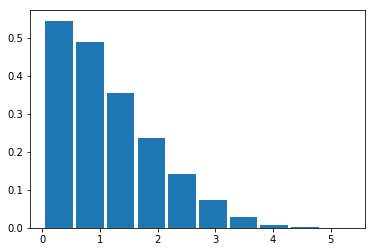

In [108]:
plt.hist(purple_flower_statistics, bins = 10, density = True, rwidth = 0.9);

Fourth we place the statistic from Mendel's sample on the histogram. Remember that Mendel had a sample with 709 purple flowers. So the statistic is

$$|(709 / 929) * 100 - 75| = (709 / 929) * 100 - 75 \approx 1.31$$

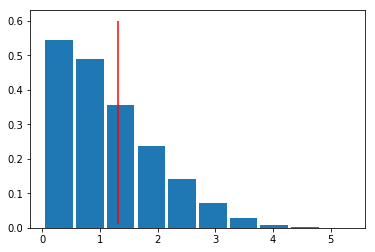

In [109]:
plt.hist(purple_flower_statistics, bins = 10, density = True, rwidth = 0.9)
plt.vlines(x = 1.31, ymin = 0.01, ymax = 0.6, color = "r");

Can we deduce that the sample was drawn at random from the population? Statistician Ronald Fisher accused Mendel of falsifying results.

### Example (Selection of Jurors)

Suppose we want to understand the demographics of a jury. The American Civil Liberties Union (ACLU) has compared the race and ethnicity of jurors against demographics in census data to assess discrimation in criminal cases. We have a table consisting of the demographics for both a jury and eligible jurors  

In [113]:
table_jury = pd.read_csv("jury_data.csv", index_col = "Ethnicity")
table_jury

,Eligible,Panels
Ethnicity,,
Asian American & Pacific Islander,0.15,0.26
African American,0.18,0.08
Latinx,0.12,0.08
Caucasian,0.54,0.54
Other,0.01,0.04


Here we used `index_col` to indicate that `Ethnicity` should be on the left hand side. 

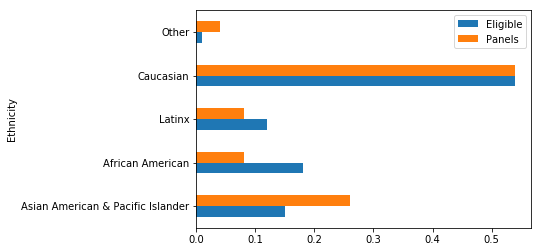

In [115]:
table_jury.plot(kind="barh");

The bar-chart indicates discrepancies in the proportions. For example, African-American looks too low and Asian American & Pacific Islander looks too high. Are these discrepancies due to chance?

Let us simulate a simple random of 1453 jurors from the population. Since the population of eligible jurors is large, we will sample with replacement.

In [118]:
trials = 1453
jury_probabilities = [0.15, 0.18, 0.12, 0.54, 0.01]

simulated_proportions = sample_proportions(1423, jury_probabilities)

In [ ]:
Now we can add a column to the table.

In [119]:
table_jury['Simulated'] = simulated_proportions
table_jury

,Eligible,Panels,Simulated
Ethnicity,,,
Asian American & Pacific Islander,0.15,0.26,0.144765
African American,0.18,0.08,0.189740
Latinx,0.12,0.08,0.121574
Caucasian,0.54,0.54,0.531975
Other,0.01,0.04,0.011947


In [121]:
table_jury['Differences'] = table_jury['Panels'] - table_jury['Simulated']
table_jury

,Eligible,Panels,Simulated,Differences
Ethnicity,,,,
Asian American & Pacific Islander,0.15,0.26,0.144765,0.115235
African American,0.18,0.08,0.189740,-0.109740
Latinx,0.12,0.08,0.121574,-0.041574
Caucasian,0.54,0.54,0.531975,0.008025
Other,0.01,0.04,0.011947,0.028053


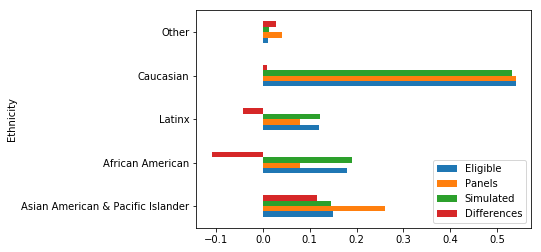

In [122]:
table_jury.plot(kind="barh");

The bar-chart suggests that the trial generated demographics similar to the population but different from the sample. Maybe the discrepancies cannot be attributed to chance?

To find out we need to perform many trials. Additionally we need to have a statistic that allow us to work with numbers instead of visualizations. Since we have multiple categories we will use `absolute_value` for each of the corresponding proportions. 

In [123]:
def total_variation_distance(dist1, dist2):
    output = 0 
    number_of_entries = len(dist1) 
    
    for counter in range(number_of_entries):
        output = output + absolute_value(dist1[counter] - dist2[counter])
        
    return output / 2

Note that the total variation distance is small between simulated trial and population but large between sample and population. 

In [132]:
difference_sample_population = total_variation_distance(jury_table["Panels"], jury_table["Eligible"])
difference_sample_population

0.14

In [125]:
total_variation_distance(sample_proportions(1423, jury_probabilities), jury_table["Eligible"])

0.008678847505270563

Let us write a helper function to simulate one trial.

In [127]:
def simulate_one_total_variation_distance(size, probabilities):
    return total_variation_distance(sample_proportions(size, probabilities), probabilities)
    

In [128]:
simulate_one_total_variation_distance(1423, jury_probabilities)

0.012909346451159529

Now we can call the function many times to replicate the trial.

In [130]:
def simulated_total_variation_distance(trials, size, probabilities):
    output = []
    
    for counter in range(trials):
        # WHAT GOES HERE?!
        new_statistic = simulate_one_total_variation_distance(size, probabilities)
        output.append(new_statistic)    
    
    return output

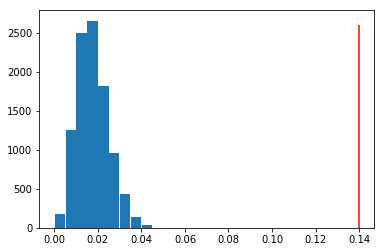

In [134]:
output = simulated_total_variation_distance(10000, 1423, jury_probabilities)
plt.hist(output, bins = np.arange(0, .05, .005), rwidth = 0.95)
plt.vlines(x = difference_sample_population, ymin=0, ymax=2600, color = "r");

Why might the numbers differ? Can we attribute it to chance? 

- Identification of race and ethinicity could impact the demographics in the census. For example, how does the census handle people identifying with multiple categories?
- Census data would not yield appropriate proportions for the demographics because eligible jurors are a subet of the population posing identification such as voter registration or drivers license. 
- Amongst people with identification, jurors must speak English and not poses a criminal backgrounds. Depending on the county, these restrictions could separate the demographics of the jury and the eligible jury.